<a href="https://colab.research.google.com/github/theaok/gisPy/blob/main/osm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OSM is like opensource google maps

but note can also get data from google maps thru API at very low cost

https://autogis-site.readthedocs.io/en/2022/lessons/lesson-6/retrieve-data-from-openstreetmap.html

In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 3.0 MB/s eta 0:00:00


In [3]:
import osmnx

In [5]:
PLACE_NAME = "Camden, NJ, USA"
graph = osmnx.graph_from_place(PLACE_NAME)

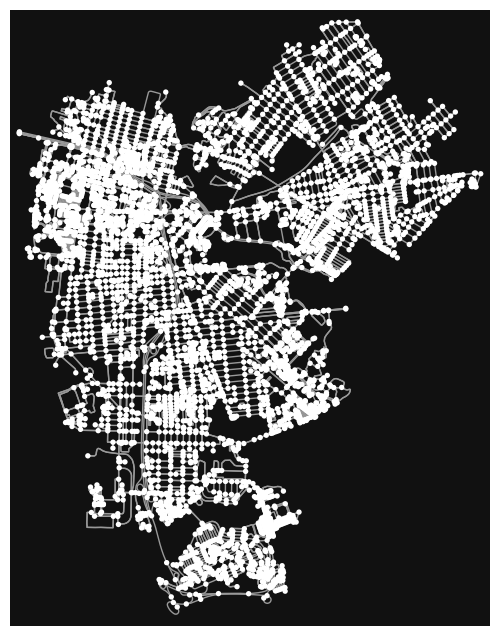

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
osmnx.plot_graph(graph)

In [7]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [8]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
103324141,39.946939,-75.069907,3,NaN,NaN,POINT (-75.06991 39.94694)
103324145,39.945362,-75.071765,4,NaN,NaN,POINT (-75.07176 39.94536)
103324151,39.943570,-75.073837,4,NaN,NaN,POINT (-75.07384 39.94357)
103324152,39.942969,-75.074564,4,NaN,NaN,POINT (-75.07456 39.94297)
103324154,39.942669,-75.074927,3,NaN,NaN,POINT (-75.07493 39.94267)


In [9]:
edges.head()

osmid lanes     ref               name  \
u         v          key                                              
103324141 7983940738 0    11589513     2  CR 662    Highland Avenue   
          8073594752 0    11596528   NaN     NaN      Myrtle Avenue   
103324145 103336051  0    11589513     2  CR 662    Highland Avenue   
103324151 103324152  0    11589513     2  CR 662    Highland Avenue   
          5679782439 0    11600289   NaN     NaN  South 33rd Street   

                              highway maxspeed  oneway reversed  length  \
u         v          key                                                  
103324141 7983940738 0       tertiary   25 mph   False    False  75.539   
          8073594752 0    residential      NaN   False     True  30.204   
103324145 103336051  0       tertiary   25 mph   False     True  79.807   
103324151 103324152  0       tertiary   25 mph   False    False  91.147   
          5679782439 0    residential      NaN    True    False  37.828   

                                                                   geometry  \
u         v          key                                                      
103324141 7983940738 0    LINESTRING (-75.06991 39.94694, -75.07049 39.9...   
          8073594752 0    LINESTRING (-75.06991 39.94694, -75.07026 39.9...   
103324145 103336051  0    LINESTRING (-75.07176 39.94536, -75.07111 39.9...   
103324151 103324152  0    LINESTRING (-75.07384 39.94357, -75.07456 39.9...   
          5679782439 0    LINESTRING (-75.07384 39.94357, -75.07402 39.9...   

                         service tunnel access bridge junction width  
u         v          key                                              
103324141 7983940738 0       NaN    NaN    NaN    NaN      NaN   NaN  
          8073594752 0       NaN    NaN    NaN    NaN      NaN   NaN  
103324145 103336051  0       NaN    NaN    NaN    NaN      NaN   NaN  
103324151 103324152  0       NaN    NaN    NaN    NaN      NaN   NaN  
          5679782439 0       NaN    NaN    NaN    NaN      NaN   NaN

In [10]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

<ipython-input-10-bd157cd7b228>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = osmnx.geometries_from_place(


In [11]:
len(buildings)

8101

In [12]:
buildings.head()

building                           name  \
element_type osmid                                                
node         329182467    public    US District Attorney Office   
             331625898    public  Delaware River Port Authority   
             367683950       yes       Camden Home for Children   
             367697781       yes        Camden Community Center   
             2152726150    salon                            NaN   

                                           geometry wikidata addr:state  ele  \
element_type osmid                                                             
node         329182467   POINT (-75.12191 39.94620)      NaN        NaN  NaN   
             331625898   POINT (-75.12963 39.94439)  Q948591        NaN  NaN   
             367683950   POINT (-75.09073 39.93095)      NaN         NJ    7   
             367697781   POINT (-75.11913 39.93801)      NaN         NJ    6   
             2152726150  POINT (-75.07462 39.95290)      NaN        NaN  NaN   

                        gnis:county_name gnis:feature_id  \
element_type osmid                                         
node         329182467               NaN             NaN   
             331625898               NaN             NaN   
             367683950            Camden          875110   
             367697781            Camden         2340243   
             2152726150              NaN             NaN   

                                             gnis:import_uuid gnis:reviewed  \
element_type osmid                                                            
node         329182467                                    NaN           NaN   
             331625898                                    NaN           NaN   
             367683950   57871b70-0100-4405-bb30-88b2e001a944            no   
             367697781   57871b70-0100-4405-bb30-88b2e001a944            no   
             2152726150                                   NaN           NaN   

                         ... generator:output:electricity generator:source  \
element_type osmid       ...                                                 
node         329182467   ...                          NaN              NaN   
             331625898   ...                          NaN              NaN   
             367683950   ...                          NaN              NaN   
             367697781   ...                          NaN              NaN   
             2152726150  ...                          NaN              NaN   

                        generator:type power ways type alt_name2 alt_name3  \
element_type osmid                                                           
node         329182467             NaN   NaN  NaN  NaN       NaN       NaN   
             331625898             NaN   NaN  NaN  NaN       NaN       NaN   
             367683950             NaN   NaN  NaN  NaN       NaN       NaN   
             367697781             NaN   NaN  NaN  NaN       NaN       NaN   
             2152726150            NaN   NaN  NaN  NaN       NaN       NaN   

                        alt_name4 designation  
element_type osmid                             
node         329182467        NaN         NaN  
             331625898        NaN         NaN  
             367683950        NaN         NaN  
             367697781        NaN         NaN  
             2152726150       NaN         NaN  

[5 rows x 138 columns]

In [14]:
buildings.columns #like 140 columns!

Index(['building', 'name', 'geometry', 'wikidata', 'addr:state', 'ele',
       'gnis:county_name', 'gnis:feature_id', 'gnis:import_uuid',
       'gnis:reviewed',
       ...
       'generator:output:electricity', 'generator:source', 'generator:type',
       'power', 'ways', 'type', 'alt_name2', 'alt_name3', 'alt_name4',
       'designation'],
      dtype='object', length=138)

In [15]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants)

<ipython-input-15-864d5fa0fa2a>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  restaurants = osmnx.geometries_from_place(


72

In [16]:
restaurants.columns.values

array(['addr:city', 'addr:housenumber', 'addr:postcode', 'addr:state',
       'addr:street', 'amenity', 'cuisine', 'name', 'geometry',
       'building', 'website', 'note', 'delivery', 'phone',
       'opening_hours', 'nodes', 'description', 'outdoor_seating'],
      dtype=object)

In [17]:
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

<ipython-input-17-5359a8c57e06>:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  parks = osmnx.geometries_from_place(


In [18]:
parks.head()

geometry  \
element_type osmid                                                          
node         357731867                         POINT (-75.09694 39.92258)   
way          29657988   POLYGON ((-75.12451 39.94867, -75.12513 39.948...   
             29876286   POLYGON ((-75.12043 39.94544, -75.12094 39.945...   
             30086370   POLYGON ((-75.07881 39.94905, -75.07878 39.949...   
             40312697   POLYGON ((-75.12181 39.92154, -75.12239 39.921...   

                        ele gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                        
node         357731867    6            007   09/08/1979          881809   
way          29657988   NaN            NaN          NaN             NaN   
             29876286   NaN            NaN          NaN             NaN   
             30086370   NaN            NaN          NaN             NaN   
             40312697   NaN            NaN          NaN             NaN   

                       gnis:state_id leisure                  name   wikidata  \
element_type osmid                                                              
node         357731867            34    park          Whitman Park  Q49580247   
way          29657988            NaN    park          Johnson Park        NaN   
             29876286            NaN    park  Roosevelt Plaza Park        NaN   
             30086370            NaN    park    Dudley Grange Park  Q49484384   
             40312697            NaN    park      Liney Ditch Park        NaN   

                       barrier  ... operator landuse website sport landcover  \
element_type osmid              ...                                            
node         357731867     NaN  ...      NaN     NaN     NaN   NaN       NaN   
way          29657988      NaN  ...      NaN     NaN     NaN   NaN       NaN   
             29876286      NaN  ...      NaN     NaN     NaN   NaN       NaN   
             30086370      NaN  ...      NaN     NaN     NaN   NaN       NaN   
             40312697    fence  ...      NaN     NaN     NaN   NaN       NaN   

                       alt_name note access ways type  
element_type osmid                                     
node         357731867      NaN  NaN    NaN  NaN  NaN  
way          29657988       NaN  NaN    NaN  NaN  NaN  
             29876286       NaN  NaN    NaN  NaN  NaN  
             30086370       NaN  NaN    NaN  NaN  NaN  
             40312697       NaN  NaN    NaN  NaN  NaN  

[5 rows x 22 columns]

<Axes: >

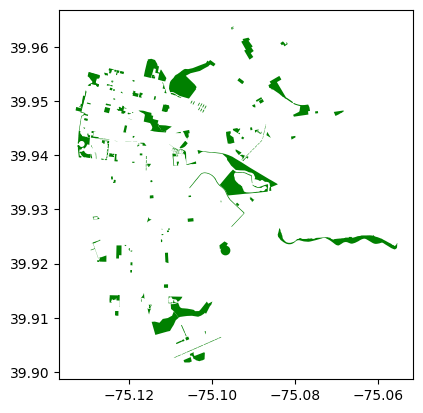

In [19]:
parks.plot(color="green")

<Axes: >

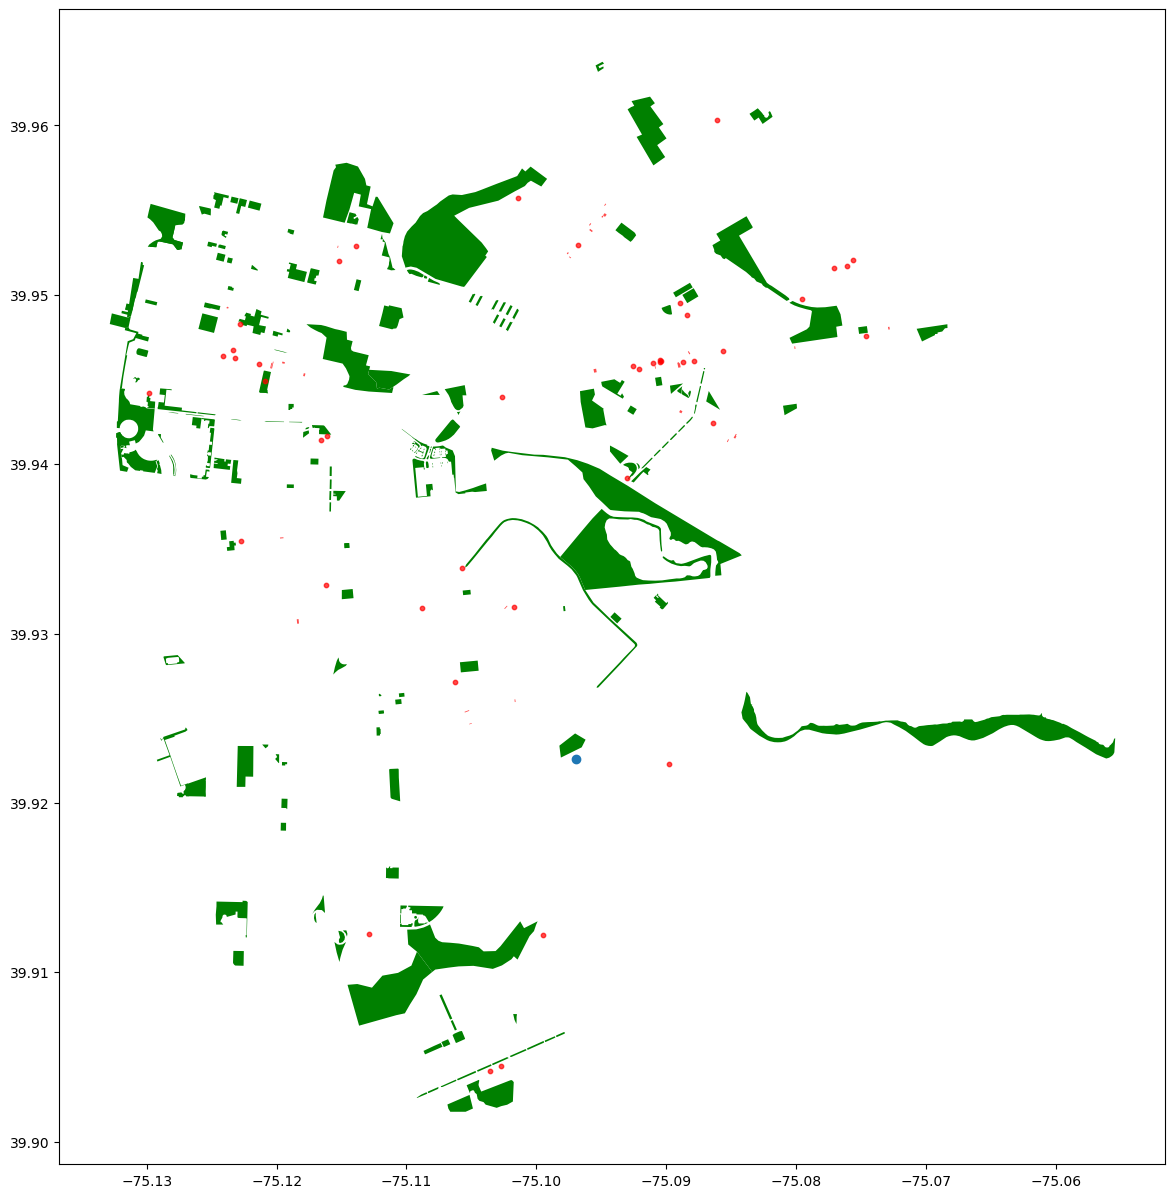

In [23]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(15,15))
parks.plot(ax=ax, facecolor="green")
#edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")
#buildings.plot(ax=ax, facecolor="silver", alpha=0.7)
restaurants.plot(ax=ax, color="red", alpha=0.7, markersize=10)